In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import math

import json

import pickle
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import ndcg_score

from matplotlib import pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
sqlite_db_path = 'retrieval_test_dataset.db'

In [6]:
df_xlm.keywords.values[1]

array([list([('other viral variant', 0.30339408), ('positively select viral mutation', 0.29932654), ('all the other circulate Sars-CoV-2 variant', 0.27414697), ('already high Sars-CoV-2 prevalence', 0.25361872), ('harsh and largely ineffective travel ban', 0.237916), ('the B.1.1.7 variant', 0.22747283), ('Sars-CoV-2 transmission', 0.20492214), ('Sars-CoV-2', 0.18530887), ('our immune response', 0.1827806), ('Covid-19', 0.1745283), ('not b.1.1.7', 0.17444399), ('other variant', 0.15844181), ('a more exceptional pathogen', 0.15537733), ('a new variant', 0.1530484), ('travel ban', 0.1519376), ('high viral load', 0.15156251), ('viral superpower', 0.14870407), ('increase viral load', 0.1483569), ('other circulating variant', 0.1432626), ('new, potentially consequential variant', 0.1420319), ('domestic travel restriction', 0.14182845), ('the variant result', 0.13472834), ('onerous travel restriction', 0.13322413), ('more severe covid-19', 0.13204655), ('b.1.1.7', 0.13128987), ('the virus', 0

In [26]:
data_dict = list(dict(df_xlm.keywords.values[0]).keys())
data_dict

['operation Warp Speed',
 'the NIH’s top vaccine researcher',
 'the July 30 Operation Warp Speed',
 'Warp Speed',
 'Warp Speed official',
 'an Operation Warp Speed grantee',
 'the Warp Speed initiative',
 'multiple Warp Speed official',
 'the Warp Speed discussion',
 'high-tech military project',
 'what army',
 'roughly 60 military official',
 'military and civilian expert',
 'operation Warp Speed’s central goal',
 'Warp Speed leader',
 'Army Materiel Command',
 'the Army’s equipment',
 'a Washington think tank',
 'the Army’s own logistic hall',
 'the military’s extensive involvement',
 'the military’s dominance',
 'the Army Corps',
 'a Defense Department expert',
 'the military’s involvement',
 'the military lead',
 'military personnel',
 'a Warp Speed contract',
 'my military',
 'military acquisition',
 'its Warp speed-relate question']

In [3]:
df = pd.read_pickle('final_dataframe.pkl')

In [6]:
df.lang.value_counts()

en    22004
de     4950
Name: lang, dtype: int64

In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
df['Document tokens'] = df.apply(lambda x:len(x['text'].split()), axis=1)

In [6]:
df.text_tokens_len.describe()

AttributeError: 'DataFrame' object has no attribute 'text_tokens_len'

In [25]:
plt.rcParams.update({'font.size': 12})


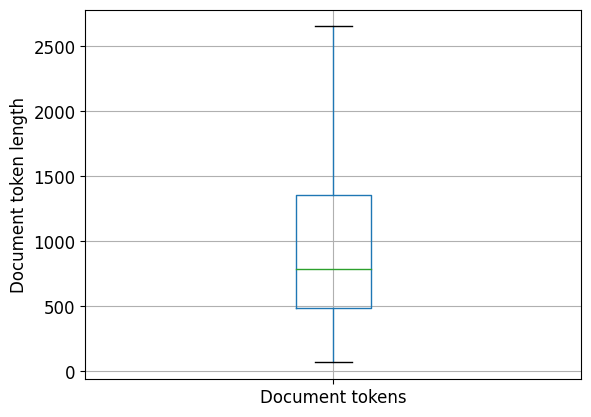

In [26]:
ax = df.boxplot(column=['Document tokens'], showfliers=False)

ax.set_ylabel('Document token length')
plt.savefig('token_length_boxplot.png')
# plt.axis('off')

# ax.set_xlabel('Token boxplot')
plt.show()

In [2]:
df_xlm = pd.read_pickle('final_keywords_dataframe.pkl')
# df_xlm = df_xlm[['id', 'text', 'lang', 'title', 'pubDate', 'label', 'text_len']]
df_xlm

,id,text,text_len,lang,text_tokens,nc_vec,label,label_name,title,pubDate,url,doc_repr_vec,keywords
0,210705_news_308386,W ASHINGTON — When President Trump unveiled Op...,2855,en,"[President Trump, Operation Warp Speed, May, h...","[[0.0007691608043387532, -0.000572989578358829...",1,technology,New chart reveals military's vast involvement ...,2020-09-28 08:46:40,https://www.statnews.com/2020/09/28/operation-...,"[0.045946658, 0.062152255, 0.027998703, 0.0134...","[(operation Warp Speed, 0.29237425), (the NIH’..."
1,210705_news_374714,B y now we all know a new variant of Sars-CoV-...,1003,en,"[y, we, all, a new variant, Sars-CoV-2, the vi...","[[-0.001561835641041398, -0.011933385394513607...",1,technology,Travel bans aren't an effective response to th...,2020-12-23 10:17:31,https://www.theguardian.com/commentisfree/2020...,"[0.014927398, 0.038264636, 0.012225271, -0.015...","[(other viral variant, 0.30339408), (positivel..."
2,210705_news_112976,Analyse: Charttechnik: Nach Einbruch - Dax kan...,191,de,"[Analyse, Einbruch, Dax, 12.769 zurückrutsch C...","[[-0.010251162573695183, -0.017037149518728256...",1,technology,Analyse - Charttechnik: Nach Einbruch - Dax ka...,2020-02-24 09:57:00,https://www.focus.de/finanzen/boerse/analyse-c...,"[-0.0040634875, -0.056905072, -0.00973385, -0....","[(12.769 zurückrutsch Chartanaly, 0.4533859), ..."
3,210705_news_328779,Learning to Decapsulate Integrated Circuits us...,3364,en,"[Decapsulate Integrated Circuits, Acid Deposit...","[[-0.00010519933130126446, 7.433861173922196e-...",1,technology,Learning to Decapsulate Integrated Circuits Us...,2020-10-21 13:12:29,https://jcjc-dev.com/2020/10/20/learning-to-de...,"[0.004496111, 0.017403085, 0.01730105, -0.0130...","[(the acid etch procedure, 0.25765887), (Room ..."
4,210705_news_100792,"“The most remarkable thing” about Dr. McEwen, ...",308,en,"[the most remarkable thing, Dr. McEwen, he, a ...","[[0.002696243580430746, -0.00724028330296278, ...",1,technology,"Bruce McEwen, who found stress can alter the b...",2020-02-12 01:25:20,https://www.nytimes.com/2020/02/10/science/bru...,"[0.0039164512, -0.0373084, 0.01460816, -0.0345...","[(Bruce McEwen, 0.4087098), (Dr. McEwen, 0.361..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26949,210705_news_251522,Eine iranische Passagiermaschine soll nach ira...,413,de,"[ein iranisch Passagiermaschine, iranisch Anga...","[[-0.006818197667598724, -0.007064135279506445...",2,military,Syrien: US-Kampfjet soll Passagierflugzeug aus...,2020-07-24 00:24:56,https://www.spiegel.de/politik/ausland/syrien-...,"[0.01764119, 0.03792382, 0.07794483, 0.0168067...","[(ein iranisch Verkehrsflugzeug, 0.4784819), (..."
26950,210705_news_290733,The ride-hailing app Wheely has written to the...,457,en,"[the ride-hail app, the UK’s Information Commi...","[[-0.010796942748129368, -0.01726151444017887,...",1,technology,Wheely ride-hailing app writes to UK privacy w...,2020-09-08 10:41:51,https://www.theguardian.com/technology/2020/se...,"[-0.012827728, 0.0447445, 0.06525452, 0.026301...","[(the ride-hail app, 0.29997644), (Uber’s perm..."
26951,210705_news_358680,"As Covid-19 cases surge in Minnesota , an oil ...",906,en,"[Covid-19 case, Minnesota, an oil company, tho...","[[-0.00863840151578188, -0.010514792986214161,...",1,technology,A huge oil pipeline is coming to Minnesota – a...,2020-12-04 11:00:00,https://www.theguardian.com/us-news/2020/dec/0...,"[0.015202089, -0.054044694, 0.021067973, 0.025...","[(a northern Minnesota pipeline, 0.5259523), (..."
26952,210705_news_442488,Die Gesundheitsämter in Mecklenburg-Vorpommern...,771,de,"[der Gesundheitsämter, Mecklenburg-Vorpommern,...","[[-0.01146282721310854, 0.0036934539675712585,...",1,technology,Luca-App: Mecklenburg-Vorpommern beginnt mit K...,2021-03-13 15:42:00,https://www.heise.de/news/Luca-App-Mecklenburg...,"[-0.042796917, 0.0074788644, 0.045728017, -0.0...","[(Luca-App, 0.47453576), (der Luca-App, 0.4289..."


In [3]:
def sqlite_common_query_seq(sqlite_db_path, sql_query, sql_select=False, sql_insert_params=None):

    print('running sqlite_common_query_seq')

    try:
        conn = sqlite3.connect(sqlite_db_path)

        cursor = conn.cursor()

        if sql_insert_params:
            cursor.execute(sql_query, sql_insert_params)
        else:
            cursor.execute(sql_query)

        if sql_select:
            query_result = cursor.fetchall()
            conn.close()

            return query_result

        conn.commit()
        conn.close()

        print('finished sqlite_common_query_seq')
    except Exception as e:
        print(e)
        
def get_query_df(query):
    
    select_table_query = """SELECT * FROM retrieval_dataset where query='"""+query+"""' order by label"""
    query_result = sqlite_common_query_seq(select_table_query, sql_select=True) 
    
    rank_df = pd.DataFrame(query_result, columns=['query', 'id', 'gt_rank'])
    query_df = pd.concat([rank_df.set_index('id'), df_xlm.set_index('id')], axis=1, join='inner').reset_index()
    
    return query_df

In [5]:
# query = 'robotik'
# query_df = get_query_df(query)

# for idx, row in query_df.iterrows():
    
#     gt_rank = row['gt_rank']
#     text = row['text']
    
#     print(f'Relevance label: {gt_rank}')
#     print(f'Document text: {text}')
    
#     print('\n\n')

In [4]:
query = 'robotik'
select_table_query = """SELECT query, count(doc_id) FROM retrieval_dataset group by query"""
# select_table_query = """SELECT query FROM retrieval_dataset"""

query_result = sqlite_common_query_seq(sqlite_db_path, select_table_query, sql_select=True) 
query_result

running sqlite_common_query_seq


[('3D-Modelle', 22),
 ('5G', 21),
 ('Combat Cloud', 29),
 ('Cyberinformationsraum', 23),
 ('Kryptographie', 6),
 ('Kryptologie', 18),
 ('Künstliche Intelligenz', 25),
 ('Militärische Kommunikation', 29),
 ('Mixed Reality', 29),
 ('Quantentechnologie', 21),
 ('Radar', 24),
 ('Waffen Systeme', 26),
 ('Wellenformen und -ausbreitung', 30),
 ('yyy_language_detection', 2),
 ('robotik', 29),
 ('unbemannte Landsysteme', 23)]

In [6]:
sqlite_db_path_new = 'backup_sqlitedb_24082022/retrieval_test_dataset.db'
query_result = sqlite_common_query_seq(sqlite_db_path_new, select_table_query, sql_select=True) 
query_result

running sqlite_common_query_seq


[('Architekturanalyse', 29),
 ('Big Data, KI für Analyse', 30),
 ('Cyber Attack', 29),
 ('Data Centric Warfare', 30),
 ('Defense', 30),
 ('Edge computing', 28),
 ('IT-Standards', 28),
 ('Kommunikationsnetze', 28),
 ('Kryptologie', 18),
 ('Methode Architektur', 29),
 ('Quantentechnologie', 24),
 ('Satellitenkommunikation', 30),
 ('Schutz von unbemannten Systemen', 30),
 ('militärische Entscheidungsfindung', 30),
 ('unbemannte Wirksysteme', 29)]

In [4]:
query = 'robotik'
# select_table_query = """DELETE FROM retrieval_dataset where query not in ('Architekturanalyse', 'Methode Architektur')"""
select_table_query = """SELECT * FROM retrieval_dataset"""

sqlite_db_path_new = 'backup_sqlitedb_24082022/retrieval_test_dataset.db'
query_result = sqlite_common_query_seq(sqlite_db_path_new, select_table_query, sql_select=True) 
query_result

running sqlite_common_query_seq


[('Methode Architektur', '210705_news_167749', 3),
 ('Methode Architektur', '210705_news_499712', 3),
 ('Methode Architektur', '210705_news_327381', 1),
 ('Methode Architektur', '210705_news_65927', 3),
 ('Methode Architektur', '210705_news_400923', 3),
 ('Methode Architektur', '210705_news_96107', 3),
 ('Methode Architektur', '210705_news_334234', 2),
 ('Methode Architektur', '210705_news_100140', 4),
 ('Methode Architektur', '210705_news_450291', 3),
 ('Methode Architektur', '210705_news_383448', 3),
 ('Methode Architektur', '210705_news_421253', 2),
 ('Methode Architektur', '210705_news_281314', 1),
 ('Methode Architektur', '210705_news_451048', 3),
 ('Methode Architektur', '210705_news_117594', 2),
 ('Methode Architektur', '210705_news_414508', 2),
 ('Methode Architektur', '210705_news_382930', 2),
 ('Methode Architektur', '210705_news_223568', 2),
 ('Methode Architektur', '210705_news_501537', 3),
 ('Methode Architektur', '210705_news_136654', 3),
 ('Methode Architektur', '210705_

In [42]:
data_df = pd.DataFrame(query_result, columns=['query', 'id', 'ranking_label'])
data_df

,query,id,ranking_label
0,Methode Architektur,210705_news_167749,3
1,Methode Architektur,210705_news_499712,3
2,Methode Architektur,210705_news_327381,1
3,Methode Architektur,210705_news_65927,3
4,Methode Architektur,210705_news_400923,3
...,...,...,...
624,Wellenformen und -ausbreitung,210705_news_435167,3
625,Wellenformen und -ausbreitung,210705_news_215565,2
626,Wellenformen und -ausbreitung,210705_news_429918,2
627,Wellenformen und -ausbreitung,210705_news_248605,2


In [46]:
len(data_df.index)

629

In [60]:
len(final_df.index)

629

In [45]:
final_df = pd.concat([data_df,df_xlm], join='inner', axis=1)
final_df.sample(2)

,query,id,ranking_label,id,text,text_len,lang,text_tokens,nc_vec,label,label_name,title,pubDate,url
597,Militärische Kommunikation,210705_news_233788,3,210705_news_173216,Seit genau 20 Jahren profitiert die Welt von v...,401,de,"[genau 20 Jahr, der Welt, viel genau Signal, d...","[[-0.007387490477412939, 0.0032398211769759655...",1,technology,"GPS – Der ""magische Kompass"" mit gewollter Ung...",2020-05-02 11:50:00,https://www.heise.de/newsticker/meldung/GPS-De...
557,Wellenformen und -ausbreitung,210705_news_399988,3,210705_news_505602,Plivo is a cloud communications platform that ...,322,en,"[Plivo, a cloud communication platform, that, ...","[[-0.0013458086177706718, 0.000758583715651184...",1,technology,Plivo (YC S12) Is Hiring a VP of Engineering B...,2021-05-24 01:00:27,https://jobs.lever.co/plivo/35b5dd7e-8f4c-4a1f...


In [57]:
final_data_list = []

for idx, row in data_df.iterrows():
    
    page_id = row['id']
    query = row['query']
    label = row['ranking_label']
    
    page_id_df = df_xlm[df_xlm['id'] == page_id]
    
    text = page_id_df['text'].values[0]
    text_len = page_id_df['text_len'].values[0]
    noun_chunks = page_id_df['text_tokens'].values[0]
    mean_nc_vec = page_id_df['nc_vec'].values[0]
    title = page_id_df['title'].values[0]
    published_date = page_id_df['pubDate'].values[0]
    source_url = page_id_df['url'].values[0]
    
    final_data_list.append({
        'page_id': page_id,
        'query': query,
        'label': label,
        'text': text,
        'text_len': text_len,
        'noun_chunks': noun_chunks,
        'mean_nc_vec': mean_nc_vec,
        'title': title,
        'published_date': published_date,
        'source_url': source_url,
    })

In [59]:
final_df = pd.DataFrame(final_data_list)
final_df.sample(2)

,page_id,query,label,text,text_len,noun_chunks,mean_nc_vec,title,published_date,source_url
566,210705_news_414016,Visualisierung,3,Abstract Reconstructing complex and dynamic vi...,154,[Abstract reconstruct complex and dynamic visu...,"[[-0.0012448010966181755, 0.001542120939120650...",Fully convolutional naturalistic video reconst...,2021-02-10 03:32:54,https://www.biorxiv.org/content/10.1101/2021.0...
305,210705_news_269350,Data Centric Warfare,2,Janes - News page Home Defence News 14 August...,2506,"[Janes - News page Home Defence News, August ...","[[-0.011103855445981026, 0.011144188232719898,...",USMC seeks new FINN gateway pod prototype,2020-08-14 07:55:41,https://www.janes.com/defence-news/usmc-seeks-...


In [61]:
final_df.to_pickle(os.getcwd()+'/../dataframes/retrieval_dataset.pkl')

In [65]:
final_df.to_json(os.getcwd()+'/../csv_data/retrieval_dataset.json', orient='records', lines=True)

In [69]:
df = pd.read_json(os.getcwd()+'/../csv_data/retrieval_dataset.json', lines=True)
df.sample(2)

,page_id,query,label,text,text_len,noun_chunks,mean_nc_vec,title,published_date,source_url
72,210705_news_281539,Kommunikationsnetze,3,Festnetztelefonie spielt sowohl im privaten al...,282,"[Festnetztelefonie, Unternehmensumfeld, ein Ro...","[[-0.0345348716, -0.0051457305, -0.0311181378,...",heise+ | DECT-VoIP-Telefone fürs Zuhause und B...,1598607900000,https://www.heise.de/tests/DECT-VoIP-Telefone-...
346,210705_news_91457,unbemannte Wirksysteme,4,Derzeit haben es unbekannte Angreifer auf das ...,244,"[es, unbekannt Angreifer, der Türöffnungssyste...","[[-0.014063155300000001, 0.0042837574, -0.0173...",Hacker knacken smarte Türöffnungssysteme für D...,1580734080000,https://www.heise.de/security/meldung/Hacker-k...


In [67]:
import json

data = json.loads(os.getcwd()+'/../csv_data/retrieval_dataset.json')

df = pd.read_json(json.dumps(data))
df.sample(2)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [63]:
final_df.columns.to_list()

['page_id',
 'query',
 'label',
 'text',
 'text_len',
 'noun_chunks',
 'mean_nc_vec',
 'title',
 'published_date',
 'source_url']

In [9]:
final_df = pd.concat([rank_df.set_index('id'),df_xlm.set_index('id')], axis=1, join='inner').reset_index()
final_df.sample(2)

,id,query,ranking_label,text,text_len,lang,text_tokens,nc_vec,label,label_name,title,pubDate,url
15,210705_news_357644,Quantentechnologie,1,Eine quantensichere Verbindung zweier Behörden...,427,de,"[ein quantensicher Verbindung, zwei Behörde, B...","[[-0.019933125004172325, 0.0031390152871608734...",1,technology,Absolut abhörsicher: Quantensicher verschlüsse...,2020-12-03 10:20:00,https://www.heise.de/news/Absolut-abhoersicher...
7,210705_news_304057,Quantentechnologie,3,In seiner mehr als 100-jährigen Geschichte hat...,771,de,"[sein mehr als 100-jährig Geschichte, IBM, der...","[[-0.0034656538628041744, -0.02294209972023964...",1,technology,IBM-Roadmap: Praktisch nutzbarer Quantencomput...,2020-09-23 05:00:00,https://www.heise.de/hintergrund/IBM-Roadmap-P...


In [10]:
final_df.to_pickle(os.getcwd()+'/../dataframes/quantum_rank_df.pkl')

In [11]:
data_df['dummy'] = 1

In [12]:
group_df = data_df.groupby(['query', 'ranking_label']).size().reset_index(name='counts')
group_df

,query,ranking_label,counts
0,Architekturanalyse,1,4
1,Architekturanalyse,2,6
2,Architekturanalyse,3,15
3,Architekturanalyse,4,4
4,"Big Data, KI für Analyse",1,7
...,...,...,...
71,unbemannte Landsysteme,3,1
72,unbemannte Landsysteme,4,17
73,unbemannte Wirksysteme,2,6
74,unbemannte Wirksysteme,3,19


In [13]:
pivot_df = group_df.pivot(index='query', columns='ranking_label', values='counts')
pivot_df = pivot_df.fillna(0)
pivot_df

ranking_label,1,2,3,4
query,,,,
Architekturanalyse,4.0,6.0,15.0,4.0
"Big Data, KI für Analyse",7.0,11.0,10.0,2.0
Cyber Attack,0.0,2.0,27.0,0.0
Data Centric Warfare,0.0,4.0,21.0,5.0
Defense,0.0,1.0,29.0,0.0
Edge computing,1.0,5.0,11.0,11.0
IT-Standards,1.0,7.0,9.0,11.0
Kommunikationsnetze,4.0,5.0,18.0,1.0
Kryptologie,0.0,0.0,4.0,14.0


In [14]:
len(pivot_df.index)

22

In [15]:
pivot_df.describe()

ranking_label,1,2,3,4
count,22.000000,22.000000,22.000000,22.000000
mean,3.545455,6.681818,13.909091,4.454545
std,3.555375,3.797071,7.243448,5.115125
min,0.000000,0.000000,1.000000,0.000000
25%,1.000000,4.250000,8.250000,0.250000
50%,3.500000,6.000000,13.500000,2.500000
75%,5.000000,9.500000,18.750000,5.750000
max,15.000000,15.000000,29.000000,17.000000


In [16]:
pivot_df.sum()

ranking_label
1     78.0
2    147.0
3    306.0
4     98.0
dtype: float64

In [17]:
for val in query_result:
    print(f'{val[0]}: {val[1]}')

Methode Architektur: 210705_news_167749
Methode Architektur: 210705_news_499712
Methode Architektur: 210705_news_327381
Methode Architektur: 210705_news_65927
Methode Architektur: 210705_news_400923
Methode Architektur: 210705_news_96107
Methode Architektur: 210705_news_334234
Methode Architektur: 210705_news_100140
Methode Architektur: 210705_news_450291
Methode Architektur: 210705_news_383448
Methode Architektur: 210705_news_421253
Methode Architektur: 210705_news_281314
Methode Architektur: 210705_news_451048
Methode Architektur: 210705_news_117594
Methode Architektur: 210705_news_414508
Methode Architektur: 210705_news_382930
Methode Architektur: 210705_news_223568
Methode Architektur: 210705_news_501537
Methode Architektur: 210705_news_136654
Methode Architektur: 210705_news_323241
Methode Architektur: 210705_news_155213
Methode Architektur: 210705_news_440579
Methode Architektur: 210705_news_401392
Methode Architektur: 210705_news_412219
Methode Architektur: 210705_news_294514
Me

In [18]:
final_df

,id,query,ranking_label,text,text_len,lang,text_tokens,nc_vec,label,label_name,title,pubDate,url
0,210705_news_53540,Quantentechnologie,3,Nach Cyberangriffen auf den Bundestag und das ...,445,de,"[Cyberangriffe, der Bundestag, der Datennetzwe...","[[-0.01808716543018818, -0.0072739748284220695...",1,technology,Netze deutscher Ministerien: Quantenkommunikat...,2019-12-16 10:26:15,https://www.spiegel.de/netzwelt/netzpolitik/qu...
1,210705_news_509066,Quantentechnologie,2,"The following is the May 24, 2021 Congressiona...",506,en,"[the following, the May 24, 2021 Congressional...","[[-0.009140371344983578, -0.002850867807865143...",1,technology,Report on Military Applications for Quantum Co...,2021-05-27 14:12:00,https://news.usni.org/2021/05/27/report-on-mil...
2,210705_news_339270,Quantentechnologie,3,\n No previous knowledge of quantum phy...,325,en,"[no previous knowledge, quantum physics, these...","[[-0.016946353018283844, -0.000419246964156627...",1,technology,CERN Online introductory lectures on quantum c...,2020-11-05 06:11:47,https://home.cern/news/announcement/computing/...
3,210705_news_285448,Quantentechnologie,2,Grundsätzlich haben Quantencomputer das Potenz...,657,de,"[Quantencomputer, der Potenzial, komplex Probl...","[[-0.010325227864086628, -0.010300491005182266...",1,technology,"Störung durch kosmische Strahlung: ""Quantencom...",2020-09-02 05:00:00,https://www.heise.de/hintergrund/Stoerung-durc...
4,210705_news_40840,Quantentechnologie,3,Amazon Braket is a fully managed quantum compu...,228,en,"[Amazon Braket, a fully manage quantum computi...","[[-0.00278931250795722, -0.0038397405296564102...",1,technology,Amazon Braket – Explore and experiment with qu...,2019-12-02 17:41:19,https://aws.amazon.com/braket/
5,210705_news_269414,Quantentechnologie,3,"Quantencomputer versprechen, bestimmte Klassen...",182,de,"[Quantencomputer, bestimmt Klasse, Problem, ei...","[[-0.005337405018508434, -0.005573826376348734...",1,technology,Amazon: Quantencomputing aus der Cloud,2020-08-14 10:31:00,https://www.heise.de/news/Amazon-Quantencomput...
6,210705_news_488902,Quantentechnologie,3,Die ETH Zürich und das Paul Scherrer Institut ...,317,de,"[der ETH Zürich, der Paul Scherrer Institut, -...","[[-0.010678855702280998, -0.008141182363033295...",1,technology,Schweiz: ETH Zürich und PSI gründen Quantum Co...,2021-05-05 08:04:00,https://www.heise.de/news/Schweiz-ETH-Zuerich-...
7,210705_news_304057,Quantentechnologie,3,In seiner mehr als 100-jährigen Geschichte hat...,771,de,"[sein mehr als 100-jährig Geschichte, IBM, der...","[[-0.0034656538628041744, -0.02294209972023964...",1,technology,IBM-Roadmap: Praktisch nutzbarer Quantencomput...,2020-09-23 05:00:00,https://www.heise.de/hintergrund/IBM-Roadmap-P...
8,210705_news_387878,Quantentechnologie,3,Der rheinland-pfälzische Pharmakonzern Boehrin...,279,de,[der rheinland-pfälzisch Pharmakonzern Boehrin...,"[[-0.0029810681007802486, -0.01681791059672832...",1,technology,Pharmaforschung: Boehringer und Google setzen ...,2021-01-11 14:00:00,https://www.heise.de/news/Pharmaforschung-Boer...
9,210705_news_158828,Quantentechnologie,1,Intel stellt Qubits für den Quantencomputer de...,272,de,"[Intel, Qubits, der Quantencomputer, der Zukun...","[[-0.007219376508146524, -0.021638957783579826...",1,technology,"Intel-Qubits für ""hitzeresistenten"" Quantencom...",2020-04-17 12:28:00,https://www.heise.de/newsticker/meldung/Intel-...
